In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

class HousePricePredictor:
    def __init__(self):
        self.model = LinearRegression()
        self.imputer = SimpleImputer(strategy="mean")
        self.features = None  # –°–ø–∏—Å–æ–∫ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤, –∏—Å–ø–æ–ª—å–∑—É–µ–º—ã—Ö –ø—Ä–∏ –æ–±—É—á–µ–Ω–∏–∏
    
    def fit(self, train_path):
        # –ó–∞–≥—Ä—É–∑–∫–∞ –æ–±—É—á–∞—é—â–∏—Ö –¥–∞–Ω–Ω—ã—Ö
        data = pd.read_csv(train_path)

        # –û—Å—Ç–∞–≤–ª—è–µ–º —Ç–æ–ª—å–∫–æ —á–∏—Å–ª–æ–≤—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏
        numeric_data = data.select_dtypes(include=[np.number])

        # –†–∞–∑–¥–µ–ª—è–µ–º –Ω–∞ –ø—Ä–∏–∑–Ω–∞–∫–∏ –∏ —Ü–µ–ª–µ–≤—É—é –ø–µ—Ä–µ–º–µ–Ω–Ω—É—é
        X = numeric_data.drop(columns=["SalePrice"])
        y = numeric_data["SalePrice"]

        # –ó–∞–ø–æ–º–∏–Ω–∞–µ–º –ø–æ—Ä—è–¥–æ–∫ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
        self.features = X.columns  

        # –ó–∞–ø–æ–ª–Ω—è–µ–º –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è —Å—Ä–µ–¥–Ω–∏–º–∏
        X = pd.DataFrame(self.imputer.fit_transform(X), columns=self.features)

        # –ö—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏—è –Ω–∞ 5 —Ñ–æ–ª–¥–æ–≤
        kf = KFold(n_splits=5, shuffle=True, random_state=42)
        scores = cross_val_score(self.model, X, y, cv=kf, scoring='neg_mean_absolute_error')

        # –û–±—É—á–∞–µ–º –º–æ–¥–µ–ª—å –Ω–∞ –≤—Å–µ—Ö –¥–∞–Ω–Ω—ã—Ö
        self.model.fit(X, y)

        print(f"Cross-validation MAE: {-np.mean(scores):.2f} ¬± {np.std(scores):.2f}")

    def predict(self, test_path, output_path):
        # –ó–∞–≥—Ä—É–∑–∫–∞ —Ç–µ—Å—Ç–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö
        test_data = pd.read_csv(test_path)

        # –°–æ—Ö—Ä–∞–Ω—è–µ–º ID
        test_ids = test_data["Id"]

        # –û—Å—Ç–∞–≤–ª—è–µ–º —Ç–æ–ª—å–∫–æ —á–∏—Å–ª–æ–≤—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏
        numeric_test = test_data.select_dtypes(include=[np.number])

        # –ü—Ä–æ–≤–µ—Ä—è–µ–º, –µ—Å—Ç—å –ª–∏ –≤—Å–µ –Ω—É–∂–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏
        missing_cols = set(self.features) - set(numeric_test.columns)
        for col in missing_cols:
            numeric_test[col] = 0  # –î–æ–±–∞–≤–ª—è–µ–º –Ω–µ–¥–æ—Å—Ç–∞—é—â–∏–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ —Å –Ω—É–ª—è–º–∏

        # –ó–∞–ø–æ–ª–Ω—è–µ–º –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è —Å—Ä–µ–¥–Ω–∏–º–∏
        X_test = pd.DataFrame(self.imputer.transform(numeric_test[self.features]), columns=self.features)

        # –î–µ–ª–∞–µ–º –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è
        predictions = self.model.predict(X_test)

        # –°–æ—Ö—Ä–∞–Ω—è–µ–º –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –≤ CSV
        result = pd.DataFrame({"Id": test_ids, "SalePrice": predictions})
        result.to_csv(output_path, index=False)
        print(f"Predictions saved to {output_path}")

# –ò—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ:
predictor = HousePricePredictor()
predictor.fit("train_hw.csv")
predictor.predict("test_hw.csv", "predictions_cross.csv")


Cross-validation MAE: 23529.18 ¬± 1758.99
Predictions saved to predictions.csv


In [34]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score

# –ó–∞–≥—Ä—É–∂–∞–µ–º –¥–∞–Ω–Ω—ã–µ
train_data = pd.read_csv("train_hw.csv")

# –û—Å—Ç–∞–≤–ª—è–µ–º —Ç–æ–ª—å–∫–æ —á–∏—Å–ª–æ–≤—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏
numeric_data = train_data.select_dtypes(include=[np.number])
X = numeric_data.drop(columns=["SalePrice", "Id"])
y = numeric_data["SalePrice"]

# –û–ø—Ä–µ–¥–µ–ª—è–µ–º pipeline
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # –ó–∞–ø–æ–ª–Ω—è–µ–º –ø—Ä–æ–ø—É—Å–∫–∏ —Å—Ä–µ–¥–Ω–∏–º –∑–Ω–∞—á–µ–Ω–∏–µ–º
    ('scaler', StandardScaler()),  # –ú–∞—Å—à—Ç–∞–±–∏—Ä—É–µ–º –¥–∞–Ω–Ω—ã–µ
    ('model', ElasticNet())  # –ú–æ–¥–µ–ª—å ElasticNet
])

# –ì–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä—ã –¥–ª—è –ø–æ–¥–±–æ—Ä–∞
param_grid = {
    'model__alpha': [110],
    'model__l1_ratio': [ 1]
}

# –ü–æ–¥–±–æ—Ä –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ —Å GridSearchCV
search = GridSearchCV(pipeline, param_grid, scoring='neg_mean_squared_error', cv=10)
search.fit(X, y)

# –û–±—É—á–∞–µ–º –ª—É—á—à—É—é –º–æ–¥–µ–ª—å –Ω–∞ –≤—Å–µ—Ö –¥–∞–Ω–Ω—ã—Ö
best_model = search.best_estimator_
best_model.fit(X, y)

# –ü–æ–ª—É—á–∞–µ–º –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –Ω–∞ –æ–±—É—á–∞—é—â–∏—Ö –¥–∞–Ω–Ω—ã—Ö
y_pred = best_model.predict(X)

# –í—ã—á–∏—Å–ª—è–µ–º –º–æ–¥—É–ª—å —Å—Ä–µ–¥–Ω–µ–π –æ—à–∏–±–∫–∏ (MAE)
mae = mean_absolute_error(y, y_pred)

# –í—ã—á–∏—Å–ª—è–µ–º R¬≤ (–∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –¥–µ—Ç–µ—Ä–º–∏–Ω–∞—Ü–∏–∏)
r2 = r2_score(y, y_pred)

# –í—ã–≤–æ–¥–∏–º —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã
print(f"–ú–æ–¥—É–ª—å —Å—Ä–µ–¥–Ω–µ–π –æ—à–∏–±–∫–∏ (MAE): {mae}")
print(f"R¬≤: {r2}")

def predict(test_file, output_file):
    # –ó–∞–≥—Ä—É–∂–∞–µ–º —Ç–µ—Å—Ç–æ–≤—ã–µ –¥–∞–Ω–Ω—ã–µ
    test_data = pd.read_csv(test_file)
    
    # –û—Å—Ç–∞–≤–ª—è–µ–º —Ç–æ–ª—å–∫–æ —á–∏—Å–ª–æ–≤—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏
    test_numeric = test_data.select_dtypes(include=[np.number])
    
    # –£–±–µ–¥–∏–º—Å—è, —á—Ç–æ —Ç–µ—Å—Ç–æ–≤—ã–µ –¥–∞–Ω–Ω—ã–µ —Å–æ–¥–µ—Ä–∂–∞—Ç —Ç–µ –∂–µ –ø—Ä–∏–∑–Ω–∞–∫–∏, —á—Ç–æ –∏ –æ–±—É—á–∞—é—â–∏–µ
    test_numeric = test_numeric.reindex(columns=X.columns, fill_value=np.nan)
    
    # –ü—Ä–æ–≥–Ω–æ–∑–∏—Ä—É–µ–º –Ω–∞ —Ç–µ—Å—Ç–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö
    predictions = best_model.predict(test_numeric)
    
    # –°–æ–∑–¥–∞–µ–º DataFrame —Å —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∞–º–∏
    result = pd.DataFrame({
        "Id": test_data["Id"],
        "SalePrice": predictions
    })
    
    # –°–æ—Ö—Ä–∞–Ω—è–µ–º —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã –≤ CSV
    result.to_csv(output_file, index=False)
    print(f"–ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è —Å–æ—Ö—Ä–∞–Ω–µ–Ω—ã –≤ {output_file}")

# –ü—Ä–æ–≥–Ω–æ–∑–∏—Ä–æ–≤–∞–Ω–∏–µ –Ω–∞ —Ç–µ—Å—Ç–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö
predict("test_hw.csv", "predictions_elastic_net.csv")


–ú–æ–¥—É–ª—å —Å—Ä–µ–¥–Ω–µ–π –æ—à–∏–±–∫–∏ (MAE): 21652.069847633327
R¬≤: 0.80293520408333
–ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è —Å–æ—Ö—Ä–∞–Ω–µ–Ω—ã –≤ predictions_elastic_net.csv


In [32]:
search.best_params_

{'model__alpha': 100, 'model__l1_ratio': 1}

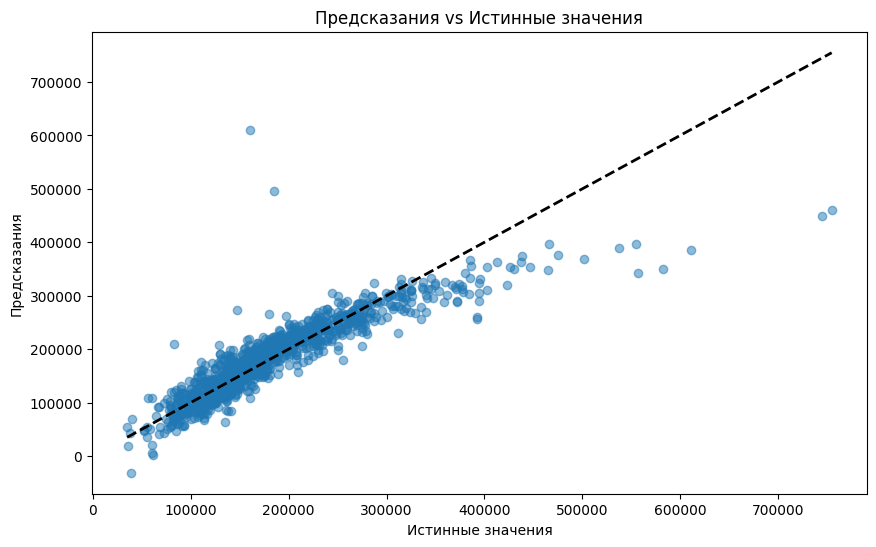

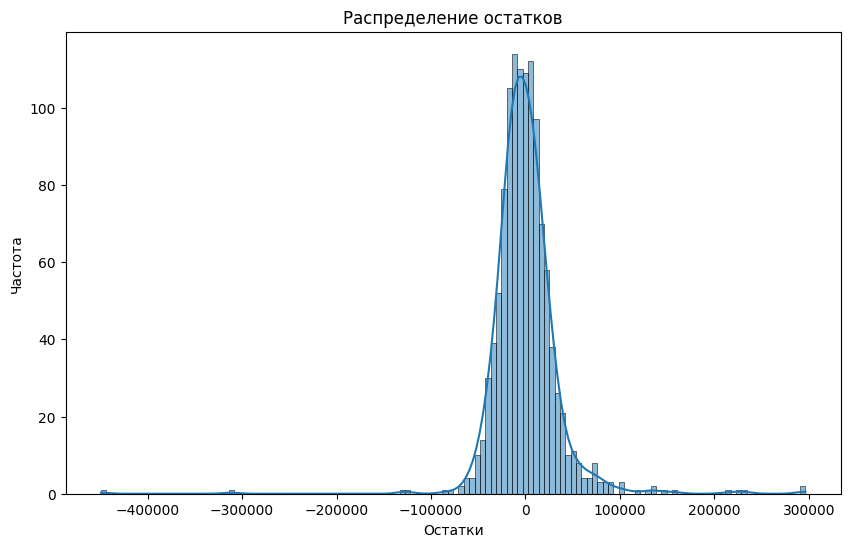

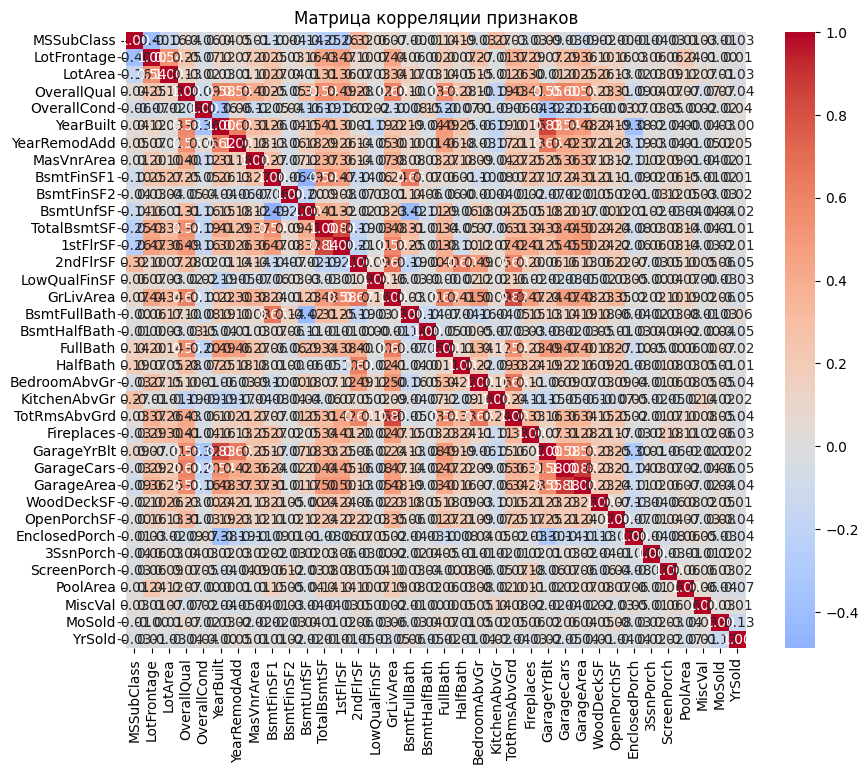

–°—Ä–µ–¥–Ω—è—è –∫–≤–∞–¥—Ä–∞—Ç–∏—á–Ω–∞—è –æ—à–∏–±–∫–∞ (MSE): 1287127675.0509217
R^2: 0.7987655651351726


In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score

# –ü–æ–ª—É—á–∞–µ–º –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è
y_pred = best_model.predict(X)

# –ì—Ä–∞—Ñ–∏–∫ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π –æ—Ç –∏—Å—Ç–∏–Ω–Ω—ã—Ö
plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred, alpha=0.5)
plt.plot([min(y), max(y)], [min(y), max(y)], 'k--', lw=2)  # –õ–∏–Ω–∏—è –∏–¥–µ–∞–ª—å–Ω—ã—Ö –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π
plt.title('–ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è vs –ò—Å—Ç–∏–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è')
plt.xlabel('–ò—Å—Ç–∏–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è')
plt.ylabel('–ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è')
plt.show()

# –ì—Ä–∞—Ñ–∏–∫ –æ—Å—Ç–∞—Ç–∫–æ–≤
residuals = y - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –æ—Å—Ç–∞—Ç–∫–æ–≤')
plt.xlabel('–û—Å—Ç–∞—Ç–∫–∏')
plt.ylabel('–ß–∞—Å—Ç–æ—Ç–∞')
plt.show()

# Heatmap –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏
corr_matrix = X.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('–ú–∞—Ç—Ä–∏—Ü–∞ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤')
plt.show()

# –û—Ü–µ–Ω–∫–∞ –º–æ–¥–µ–ª–∏: MSE –∏ R^2
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
print(f"–°—Ä–µ–¥–Ω—è—è –∫–≤–∞–¥—Ä–∞—Ç–∏—á–Ω–∞—è –æ—à–∏–±–∫–∞ (MSE): {mse}")
print(f"R^2: {r2}")


In [41]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# –ó–∞–≥—Ä—É–∂–∞–µ–º –æ–±—É—á–∞—é—â–∏–µ –¥–∞–Ω–Ω—ã–µ
train_data = pd.read_csv("train_hw.csv")

# –°–æ–∑–¥–∞–µ–º X –∏ y, –∏—Å–ø–æ–ª—å–∑—É—è –≤—Å–µ –ø—Ä–∏–∑–Ω–∞–∫–∏, –∫—Ä–æ–º–µ SalePrice –∏ Id
X = train_data.drop(columns=["SalePrice", "Id"])
y = train_data["SalePrice"]

# –û–ø—Ä–µ–¥–µ–ª—è–µ–º —Å–ø–∏—Å–∫–∏ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
numeric_features = X.select_dtypes(include=[np.number]).columns
categorical_features = X.select_dtypes(exclude=[np.number]).columns

# –û–ø—Ä–µ–¥–µ–ª—è–µ–º —Ç—Ä–∞–Ω—Å—Ñ–æ—Ä–º–µ—Ä –¥–ª—è —á–∏—Å–ª–æ–≤—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# –û–ø—Ä–µ–¥–µ–ª—è–µ–º —Ç—Ä–∞–Ω—Å—Ñ–æ—Ä–º–µ—Ä –¥–ª—è –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# –û–±—ä–µ–¥–∏–Ω—è–µ–º —á–∏—Å–ª–æ–≤—ã–µ –∏ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# –ü–æ–ª–Ω—ã–π pipeline, –≤–∫–ª—é—á–∞—é—â–∏–π –ø—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫—É –∏ –º–æ–¥–µ–ª—å
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', ElasticNet(max_iter=10000))
])

# –û–ø—Ä–µ–¥–µ–ª—è–µ–º –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä—ã –¥–ª—è –ø–æ–¥–±–æ—Ä–∞
param_grid = {
    'model__alpha': [115, 120, 125],
    'model__l1_ratio': [0.99, 1]
}

# –ü–æ–¥–±–∏—Ä–∞–µ–º –ª—É—á—à–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã —Å –ø–æ–º–æ—â—å—é GridSearchCV (–æ—Ü–µ–Ω–∫–∞ –ø–æ neg MAE)
search = GridSearchCV(pipeline, param_grid, scoring='neg_mean_absolute_error', cv=5)
search.fit(X, y)

# –ü–æ–ª—É—á–∞–µ–º –ª—É—á—à—É—é –º–æ–¥–µ–ª—å
best_model = search.best_estimator_

# –í—ã—á–∏—Å–ª—è–µ–º MAE –∏ R^2 –Ω–∞ –æ–±—É—á–∞—é—â–∏—Ö –¥–∞–Ω–Ω—ã—Ö
y_pred = best_model.predict(X)
mae = mean_absolute_error(y, y_pred)
r2 = best_model.score(X, y)
print(f"–°—Ä–µ–¥–Ω–∏–π –º–æ–¥—É–ª—å –æ—à–∏–±–∫–∏ (MAE): {mae}")
print(f"R^2: {r2}")

# –§—É–Ω–∫—Ü–∏—è –¥–ª—è –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π –Ω–∞ —Ç–µ—Å—Ç–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö
def predict(test_file, output_file):
    test_data = pd.read_csv(test_file)
    # –°–æ–∑–¥–∞–µ–º X –¥–ª—è —Ç–µ—Å—Ç–∞ –∞–Ω–∞–ª–æ–≥–∏—á–Ω–æ –æ–±—É—á–∞—é—â–∏–º –¥–∞–Ω–Ω—ã–º
    test_X = test_data.drop(columns=["Id"])
    
    predictions = best_model.predict(test_X)
    
    result = pd.DataFrame({
        "Id": test_data["Id"],
        "SalePrice": predictions
    })
    
    result.to_csv(output_file, index=False)
    print(f"–ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è —Å–æ—Ö—Ä–∞–Ω–µ–Ω—ã –≤ {output_file}")
    print(search.best_params_)

predict("test_hw.csv", "predictions_elastic_net_with_cat.csv")


–°—Ä–µ–¥–Ω–∏–π –º–æ–¥—É–ª—å –æ—à–∏–±–∫–∏ (MAE): 14721.768591271873
R^2: 0.9124618456843631
–ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è —Å–æ—Ö—Ä–∞–Ω–µ–Ω—ã –≤ predictions_elastic_net_with_cat.csv
{'model__alpha': 115, 'model__l1_ratio': 1}


In [33]:
search.best_estimator_

Pipeline(steps=[('dropper',
                 FunctionTransformer(func=<function drop_features at 0x000002F3DE61E660>)),
                ('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1...
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object'))])),
                ('model', ElasticNet(alpha=110, l1_ratio=1, max_iter=10000))])

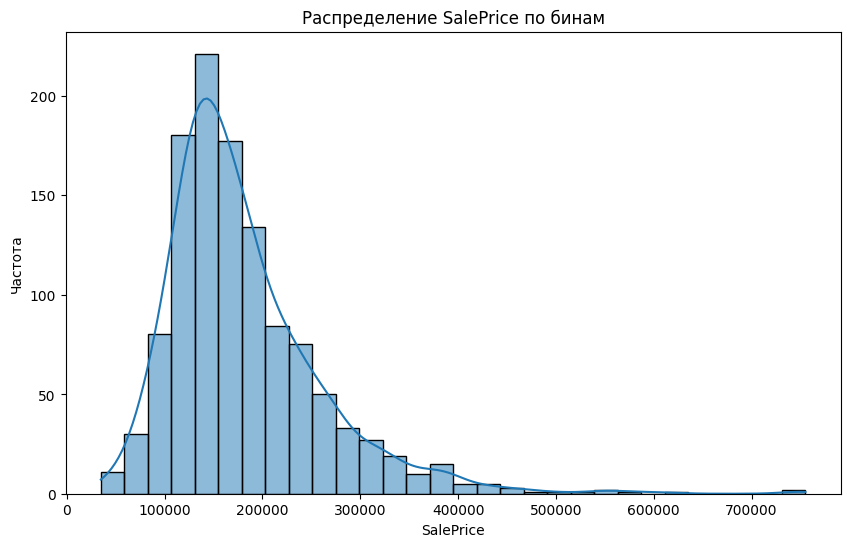

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# –ó–∞–≥—Ä—É–∂–∞–µ–º –¥–∞–Ω–Ω—ã–µ
train_data = pd.read_csv("train_hw.csv")

# –°–æ–∑–¥–∞—ë–º –≥–∏—Å—Ç–æ–≥—Ä–∞–º–º—É —Å —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ–º SalePrice
plt.figure(figsize=(10, 6))
sns.histplot(train_data['SalePrice'], bins=30, kde=True)  # kde=True –¥–ª—è –Ω–∞–ª–æ–∂–µ–Ω–∏—è –∫—Ä–∏–≤–æ–π –ø–ª–æ—Ç–Ω–æ—Å—Ç–∏
plt.title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ SalePrice –ø–æ –±–∏–Ω–∞–º')
plt.xlabel('SalePrice')
plt.ylabel('–ß–∞—Å—Ç–æ—Ç–∞')
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# –ó–∞–≥—Ä—É–∂–∞–µ–º –¥–∞–Ω–Ω—ã–µ
train_data = pd.read_csv("train_hw.csv")

# –û–ø—Ä–µ–¥–µ–ª—è–µ–º 90-–π –ø—Ä–æ—Ü–µ–Ω—Ç–∏–ª—å –¥–ª—è SalePrice
percentile_90 = np.percentile(train_data['SalePrice'], 100)

# –û—Ç—Ñ–∏–ª—å—Ç—Ä–æ–≤—ã–≤–∞–µ–º –¥–∞–Ω–Ω—ã–µ, –æ—Å—Ç–∞–≤–ª—è–µ–º —Ç–æ–ª—å–∫–æ —Ç–µ, –≥–¥–µ SalePrice <= 90-–π –ø—Ä–æ—Ü–µ–Ω—Ç–∏–ª—å
filtered_data = train_data[train_data['SalePrice'] <= percentile_90]

# –§–æ—Ä–º–∏—Ä—É–µ–º X –∫–∞–∫ –≤—Å–µ –ø—Ä–∏–∑–Ω–∞–∫–∏, –∫—Ä–æ–º–µ SalePrice –∏ Id, –∏–∑ —Ñ–∏–ª—å—Ç—Ä–æ–≤–∞–Ω–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö
X = filtered_data.drop(columns=["SalePrice", "Id"])
y = filtered_data["SalePrice"]

# –û–ø—Ä–µ–¥–µ–ª—è–µ–º —á–∏—Å–ª–æ–≤—ã–µ –∏ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ –Ω–∞ –æ—Å–Ω–æ–≤–µ X
numeric_features = X.select_dtypes(include=[np.number]).columns
categorical_features = X.select_dtypes(exclude=[np.number]).columns

# –û–ø—Ä–µ–¥–µ–ª—è–µ–º pipeline –¥–ª—è —á–∏—Å–ª–æ–≤—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# –û–ø—Ä–µ–¥–µ–ª—è–µ–º pipeline –¥–ª—è –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# –û–±—ä–µ–¥–∏–Ω—è–µ–º —á–∏—Å–ª–æ–≤—ã–µ –∏ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ –≤ ColumnTransformer,
# –∏—Å–ø–æ–ª—å–∑—É—è –∏–º–µ–Ω–∞ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –∏–∑ X, —á—Ç–æ–±—ã –æ–Ω–∏ —Ç–æ—á–Ω–æ —Å–æ–≤–ø–∞–¥–∞–ª–∏.
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# –ü–æ–ª–Ω—ã–π pipeline —Å ElasticNet (–∂—ë—Å—Ç–∫–∞—è Lasso —Ä–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü–∏—è: alpha=100, l1_ratio=1)
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', ElasticNet(alpha=100, l1_ratio=1, max_iter=5000))
])

# –†–∞–∑–¥–µ–ª—è–µ–º –¥–∞–Ω–Ω—ã–µ –Ω–∞ –æ–±—É—á–∞—é—â—É—é –∏ —Ç–µ—Å—Ç–æ–≤—É—é –≤—ã–±–æ—Ä–∫–∏
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# –û–±—É—á–∞–µ–º –º–æ–¥–µ–ª—å
pipeline.fit(X_train, y_train)

# –ü–æ–ª—É—á–∞–µ–º –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –∏ –æ—Ü–µ–Ω–∏–≤–∞–µ–º –º–æ–¥–µ–ª—å
y_pred = pipeline.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f"–°—Ä–µ–¥–Ω–∏–π –º–æ–¥—É–ª—å –æ—à–∏–±–∫–∏ (MAE): {mae}")

# –§—É–Ω–∫—Ü–∏—è –¥–ª—è –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –Ω–∞ —Ç–µ—Å—Ç–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö –∏ —Å–æ—Ö—Ä–∞–Ω–µ–Ω–∏—è —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤
def predict(test_file, output_file):
    test_data = pd.read_csv(test_file)
    # –ü—Ä–µ–¥–ø–æ–ª–∞–≥–∞–µ—Ç—Å—è, —á—Ç–æ —Ç–µ—Å—Ç–æ–≤—ã–π –Ω–∞–±–æ—Ä –∏–º–µ–µ—Ç —Ç—É –∂–µ —Å—Ç—Ä—É–∫—Ç—É—Ä—É, —á—Ç–æ –∏ –æ–±—É—á–∞—é—â–∏–π (–±–µ–∑ SalePrice)
    X_test_data = test_data.drop(columns=["Id"])
    predictions = pipeline.predict(X_test_data)
    result = pd.DataFrame({
        "Id": test_data["Id"],
        "SalePrice": predictions
    })
    result.to_csv(output_file, index=False)
    print(f"–ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è —Å–æ—Ö—Ä–∞–Ω–µ–Ω—ã –≤ {output_file}")

# –ü—Ä–∏–º–µ—Ä –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏—è —Ñ—É–Ω–∫—Ü–∏–∏ –¥–ª—è —Ç–µ—Å—Ç–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö
predict("test_hw.csv", "predictions_elastic_net_with_cat_perc.csv")


InvalidParameterError: The 'alpha' parameter of ElasticNet must be a float in the range [0.0, inf). Got [100, 110, 120, 130, 150] instead.

In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer

# –§—É–Ω–∫—Ü–∏—è –¥–ª—è –æ–≥—Ä–∞–Ω–∏—á–µ–Ω–∏—è –≤—ã–±—Ä–æ—Å–æ–≤ –ø–æ IQR
def clip_outliers_iqr(df, columns):
    df = df.copy()
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 3 * IQR
        upper_bound = Q3 + 3 * IQR
        df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)
    return df

# –ó–∞–≥—Ä—É–∂–∞–µ–º –¥–∞–Ω–Ω—ã–µ
train_data = pd.read_csv("train_hw.csv")

# –°–æ–∑–¥–∞–µ–º X –∏ y, –∏—Å–ø–æ–ª—å–∑—É—è –≤—Å–µ –ø—Ä–∏–∑–Ω–∞–∫–∏, –∫—Ä–æ–º–µ SalePrice –∏ Id
X = train_data.drop(columns=["SalePrice", "Id"])
y = train_data["SalePrice"]

# –û–ø—Ä–µ–¥–µ–ª—è–µ–º —Å–ø–∏—Å–∫–∏ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X.select_dtypes(exclude=[np.number]).columns.tolist()

# üîπ –û–±—Ä–∞–±–æ—Ç—á–∏–∫ –≤—ã–±—Ä–æ—Å–æ–≤ —Å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ–º IQR
numeric_transformer = Pipeline(steps=[
    ('clipper', FunctionTransformer(lambda df: clip_outliers_iqr(df, df.columns), validate=False)),
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# –¢—Ä–∞–Ω—Å—Ñ–æ—Ä–º–µ—Ä –¥–ª—è –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# –û–±—ä–µ–¥–∏–Ω—è–µ–º —á–∏—Å–ª–æ–≤—ã–µ –∏ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# –ü–æ–ª–Ω—ã–π pipeline —Å Lasso (L1-—Ä–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü–∏—è)
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', Lasso(max_iter=10000))
])

# –û–ø—Ä–µ–¥–µ–ª—è–µ–º –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä—ã –¥–ª—è Lasso
param_grid = {
    'model__alpha': [125, 150]
}

# –ü–æ–¥–±–æ—Ä –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ —á–µ—Ä–µ–∑ GridSearchCV (–ø–æ –æ—Ç—Ä–∏—Ü–∞—Ç–µ–ª—å–Ω–æ–º—É MAE)
search = GridSearchCV(pipeline, param_grid, scoring='neg_mean_absolute_error', cv=5)
search.fit(X, y)

# –ü–æ–ª—É—á–∞–µ–º –ª—É—á—à—É—é –º–æ–¥–µ–ª—å
best_model = search.best_estimator_

# –í—ã—á–∏—Å–ª—è–µ–º MAE –∏ R^2 –Ω–∞ –æ–±—É—á–∞—é—â–µ–º –Ω–∞–±–æ—Ä–µ
y_pred = best_model.predict(X)
mae = mean_absolute_error(y, y_pred)
r2 = best_model.score(X, y)
print(f"–°—Ä–µ–¥–Ω–∏–π –º–æ–¥—É–ª—å –æ—à–∏–±–∫–∏ (MAE): {mae}")
print(f"R^2: {r2}")

# –§—É–Ω–∫—Ü–∏—è –¥–ª—è –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π –Ω–∞ —Ç–µ—Å—Ç–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö
def predict(test_file, output_file):
    test_data = pd.read_csv(test_file)
    test_X = test_data.drop(columns=["Id"])
    predictions = best_model.predict(test_X)
    result = pd.DataFrame({
        "Id": test_data["Id"],
        "SalePrice": predictions
    })
    result.to_csv(output_file, index=False)
    print(f"–ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è —Å–æ—Ö—Ä–∞–Ω–µ–Ω—ã –≤ {output_file}")

# –ó–∞–ø—É—Å–∫–∞–µ–º –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è
predict("test_hw.csv", "predictions_lasso_iqr.csv")


–°—Ä–µ–¥–Ω–∏–π –º–æ–¥—É–ª—å –æ—à–∏–±–∫–∏ (MAE): 14801.174687968745
R^2: 0.9056545037944291
–ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è —Å–æ—Ö—Ä–∞–Ω–µ–Ω—ã –≤ predictions_lasso_iqr.csv


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer

# –û–ø—Ä–µ–¥–µ–ª–∏–º —Ñ—É–Ω–∫—Ü–∏–∏ –¥–ª—è –∫–æ–¥–∏—Ä–æ–≤–∞–Ω–∏—è

def encode_ordered(df):
    """–ü—Ä–µ–æ–±—Ä–∞–∑—É–µ—Ç —É–ø–æ—Ä—è–¥–æ—á–µ–Ω–Ω—ã–µ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ –≤ —á–∏—Å–ª–æ–≤—ã–µ –ø–æ –∑–∞–¥–∞–Ω–Ω—ã–º –ø—Ä–∞–≤–∏–ª–∞–º."""
    df = df.copy()
    mapping = {
        "ExterQual": {"Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5},
        "ExterCond": {"Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5},
        "BsmtQual": {"NA": 0, "Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5},
        "BsmtCond": {"NA": 0, "Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5},
        "BsmtExposure": {"NA": 0, "No": 1, "Mn": 2, "Av": 3, "Gd": 4},
        "KitchenQual": {"Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5},
        "HeatingQC": {"Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5},
        "FireplaceQu": {"NA": 0, "Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5},
        "GarageQual": {"NA": 0, "Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5},
        "GarageCond": {"NA": 0, "Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5}
    }
    for col, map_dict in mapping.items():
        if col in df.columns:
            df[col] = df[col].replace(map_dict)
    return df

def encode_simple(df):
    """–ü—Ä–æ—Å—Ç–æ–µ –∫–æ–¥–∏—Ä–æ–≤–∞–Ω–∏–µ: CentralAir (N->0, Y->1) –∏ GarageFinish."""
    df = df.copy()
    if "CentralAir" in df.columns:
        df["CentralAir"] = df["CentralAir"].replace({'N': 0, 'Y': 1})
    if "GarageFinish" in df.columns:
        df["GarageFinish"] = df["GarageFinish"].replace({"NA": 0, "Unf": 1, "RFn": 2, "Fin": 3})
    return df

# –ó–∞–≥—Ä—É–∂–∞–µ–º –æ–±—É—á–∞—é—â–∏–µ –¥–∞–Ω–Ω—ã–µ
train_data = pd.read_csv("train_hw.csv")

# –°–æ–∑–¥–∞–µ–º X –∏ y, –∏—Å–ø–æ–ª—å–∑—É—è –≤—Å–µ –ø—Ä–∏–∑–Ω–∞–∫–∏, –∫—Ä–æ–º–µ SalePrice –∏ Id
X = train_data.drop(columns=["SalePrice", "Id"])
y = train_data["SalePrice"]

# –û–ø—Ä–µ–¥–µ–ª—è–µ–º —Å–ø–∏—Å–∫–∏ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
# –ü—Ä–µ–¥–ø–æ–ª–∞–≥–∞–µ–º, —á—Ç–æ –ø—Ä–∏–∑–Ω–∞–∫–∏ –≤ train_data –∏–º–µ—é—Ç —Å–ª–µ–¥—É—é—â–∏–µ –∏–º–µ–Ω–∞:
ordered_cols = ["ExterQual", "ExterCond", "BsmtQual", "BsmtCond", 
                "BsmtExposure", "KitchenQual", "HeatingQC", "FireplaceQu", 
                "GarageQual", "GarageCond"]
simple_cols = ["CentralAir", "GarageFinish"]
# –û—Å—Ç–∞–ª—å–Ω—ã–µ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ (–∏–∑ –≤—Å–µ—Ö, —á—Ç–æ –Ω–µ —á–∏—Å–ª–æ–≤—ã–µ)
all_cat = X.select_dtypes(exclude=[np.number]).columns.tolist()
group2_cols = [col for col in all_cat if col not in ordered_cols and col not in simple_cols]

# –ß–∏—Å–ª–æ–≤—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏
numeric_cols = X.select_dtypes(include=[np.number]).columns.tolist()

# –û–ø—Ä–µ–¥–µ–ª—è–µ–º —Ç—Ä–∞–Ω—Å—Ñ–æ—Ä–º–µ—Ä—ã –¥–ª—è –∫–∞–∂–¥–æ–π –≥—Ä—É–ø–ø—ã
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

ordered_transformer = Pipeline(steps=[
    ('encoder', FunctionTransformer(encode_ordered, validate=False)),
    ('imputer', SimpleImputer(strategy='mean')),  # –ü–æ—Å–ª–µ –∫–æ–¥–∏—Ä–æ–≤–∞–Ω–∏—è, NaN –∑–∞–ø–æ–ª–Ω–∏—Ç—å —Å—Ä–µ–¥–Ω–∏–º
    ('scaler', StandardScaler())
])

simple_transformer = Pipeline(steps=[
    ('encoder', FunctionTransformer(encode_simple, validate=False))
    # –ú–æ–∂–Ω–æ –¥–æ–±–∞–≤–∏—Ç—å –∏–º–ø—å—é—Ç–∞—Ü–∏—é, –µ—Å–ª–∏ –Ω—É–∂–Ω–æ
])

group2_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# –°–æ–±–∏—Ä–∞–µ–º ColumnTransformer: –¥–ª—è —á–∏—Å–ª–æ–≤—ã—Ö –∏ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –æ—Ç–¥–µ–ª—å–Ω–æ.
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_cols),
    ('ord', ordered_transformer, ordered_cols),
    ('simp', simple_transformer, simple_cols),
    ('cat', group2_transformer, group2_cols)
], remainder='passthrough')  # –ï—Å–ª–∏ –µ—Å—Ç—å –ø—Ä–∏–∑–Ω–∞–∫–∏, –∫–æ—Ç–æ—Ä—ã–µ –Ω–µ –ø–æ–ø–∞–ª–∏ –≤ –≥—Ä—É–ø–ø—ã, –ø—Ä–æ–ø—É—Å–∫–∞–µ–º –∏—Ö

# –ü–æ–ª–Ω—ã–π pipeline —Å Lasso (—á–∏—Å—Ç–∞—è L1-—Ä–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü–∏—è)
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', Lasso(max_iter=10000))
])

# –û–ø—Ä–µ–¥–µ–ª—è–µ–º –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä—ã –¥–ª—è Lasso (–ø–æ–¥–±–∏—Ä–∞–µ–º alpha)
param_grid = {
    'model__alpha': [115, 120, 125]
}

# –ü–æ–¥–±–∏—Ä–∞–µ–º –ª—É—á—à–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã —Å –ø–æ–º–æ—â—å—é GridSearchCV (–æ—Ü–µ–Ω–∏–≤–∞–µ–º –ø–æ –æ—Ç—Ä–∏—Ü–∞—Ç–µ–ª—å–Ω–æ–º—É MAE, cv=5)
search = GridSearchCV(pipeline, param_grid, scoring='neg_mean_absolute_error', cv=5)
search.fit(X, y)

# –ü–æ–ª—É—á–∞–µ–º –ª—É—á—à—É—é –º–æ–¥–µ–ª—å
best_model = search.best_estimator_

# –í—ã—á–∏—Å–ª—è–µ–º MAE –∏ R^2 –Ω–∞ –æ–±—É—á–∞—é—â–∏—Ö –¥–∞–Ω–Ω—ã—Ö
y_pred = best_model.predict(X)
mae = mean_absolute_error(y, y_pred)
r2 = best_model.score(X, y)
print(f"–°—Ä–µ–¥–Ω–∏–π –º–æ–¥—É–ª—å –æ—à–∏–±–∫–∏ (MAE): {mae}")
print(f"R^2: {r2}")

# –§—É–Ω–∫—Ü–∏—è –¥–ª—è –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π –Ω–∞ —Ç–µ—Å—Ç–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö
def predict(test_file, output_file):
    test_data = pd.read_csv(test_file)
    test_X = test_data.drop(columns=["Id"])
    predictions = best_model.predict(test_X)
    result = pd.DataFrame({
        "Id": test_data["Id"],
        "SalePrice": predictions
    })
    result.to_csv(output_file, index=False)
    print(f"–ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è —Å–æ—Ö—Ä–∞–Ω–µ–Ω—ã –≤ {output_file}")

predict("test_hw.csv", "predictions_worst.csv")


C:\Users\Dima\AppData\Local\Temp\ipykernel_5028\828935552.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].replace(map_dict)
C:\Users\Dima\AppData\Local\Temp\ipykernel_5028\828935552.py:37: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["CentralAir"] = df["CentralAir"].replace({'N': 0, 'Y': 1})
C:\Users\Dima\AppData\Local\Temp\ipykernel_5028\828935552.py:39: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `re

ValueError: 
All the 15 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Dima\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Dima\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dima\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\pipeline.py", line 662, in fit
    self._final_estimator.fit(Xt, y, **last_step_params["fit"])
  File "c:\Users\Dima\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dima\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py", line 982, in fit
    X, y = validate_data(
           ^^^^^^^^^^^^^^
  File "c:\Users\Dima\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py", line 2961, in validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dima\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py", line 1370, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "c:\Users\Dima\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py", line 1107, in check_array
    _assert_all_finite(
  File "c:\Users\Dima\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py", line 120, in _assert_all_finite
    _assert_all_finite_element_wise(
  File "c:\Users\Dima\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py", line 169, in _assert_all_finite_element_wise
    raise ValueError(msg_err)
ValueError: Input X contains NaN.
Lasso does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values
